In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

In [32]:
data=pd.read_csv("D:\Excel R\Assignments\Assignment 15\Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [34]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [35]:
rvn=pd.cut(data['Sales'],bins=[0,5.75,11.25,16],labels=['Low','Moderate','High'])
rvn

0      Moderate
1      Moderate
2      Moderate
3      Moderate
4           Low
         ...   
395        High
396    Moderate
397    Moderate
398    Moderate
399    Moderate
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Moderate' < 'High']

In [36]:
data['Status']=rvn
d1=data.drop(['Sales'],axis=1)
d1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Moderate
1,111,48,16,260,83,Good,65,10,Yes,Yes,Moderate
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Moderate
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Moderate
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Moderate
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Moderate
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Moderate


In [37]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    400 non-null    int64   
 1   Income       400 non-null    int64   
 2   Advertising  400 non-null    int64   
 3   Population   400 non-null    int64   
 4   Price        400 non-null    int64   
 5   ShelveLoc    400 non-null    object  
 6   Age          400 non-null    int64   
 7   Education    400 non-null    int64   
 8   Urban        400 non-null    object  
 9   US           400 non-null    object  
 10  Status       398 non-null    category
dtypes: category(1), int64(7), object(3)
memory usage: 31.9+ KB


In [38]:
d1.Status.isna().sum()

2

In [39]:
d1[d1.isna().any(axis=1)].head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
174,139,24,0,358,185,Medium,79,15,No,No,NaN
376,141,60,19,319,92,Good,44,11,Yes,Yes,NaN


In [40]:
md='Moderate'
d1['Status']=d1['Status'].fillna(md)
d1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Moderate
1,111,48,16,260,83,Good,65,10,Yes,Yes,Moderate
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Moderate
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Moderate
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Moderate
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Moderate
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Moderate


In [41]:
d1.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Status         0
dtype: int64

In [42]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [43]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Status, Length: 400, dtype: int64

In [44]:
obj=['ShelveLoc','Urban','US']
d1[obj]=d1[obj].astype('category')

In [45]:
### Encode the categorical variable:-
obj1=['ShelveLoc','Urban','US','Status']
d1[obj1]=d1[obj1].apply(LabelEncoder().fit_transform)
d1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,2
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,2
397,162,26,12,368,159,2,40,18,1,1,2
398,100,79,7,284,95,0,50,12,1,1,2


In [46]:
x=d1.iloc[:,0:10]
y=d1.iloc[:,10]

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
res=[]
for i in range(100,150):
    rfc=RandomForestClassifier(n_estimators=i,max_features=3,oob_score=True)
    rfc.fit(x_train,y_train)
    train_acc=np.mean(y_train==rfc.predict(x_train))
    test_acc=np.mean(y_test==rfc.predict(x_test))
    oob_score=rfc.oob_score_
    res.append([oob_score,train_acc,test_acc])

In [49]:
Results=pd.DataFrame(res,columns=['Oob Score','Train Accuracy','Test Accuracy'])
Results['no_estimators']=np.arange(100,150)
Results

,Oob Score,Train Accuracy,Test Accuracy,no_estimators
0,0.696875,1.0,0.7000,100
1,0.690625,1.0,0.6625,101
2,0.684375,1.0,0.6875,102
3,0.693750,1.0,0.7125,103
4,0.693750,1.0,0.7250,104
5,0.684375,1.0,0.6875,105
6,0.721875,1.0,0.6875,106
7,0.690625,1.0,0.7125,107
8,0.709375,1.0,0.7000,108
9,0.696875,1.0,0.7000,109


In [50]:
Results.sort_values(by='Test Accuracy',ascending=False)

,Oob Score,Train Accuracy,Test Accuracy,no_estimators
18,0.681250,1.0,0.7500,118
30,0.715625,1.0,0.7250,130
4,0.693750,1.0,0.7250,104
24,0.687500,1.0,0.7250,124
29,0.687500,1.0,0.7250,129
48,0.709375,1.0,0.7125,148
3,0.693750,1.0,0.7125,103
45,0.693750,1.0,0.7125,145
43,0.700000,1.0,0.7125,143
7,0.690625,1.0,0.7125,107


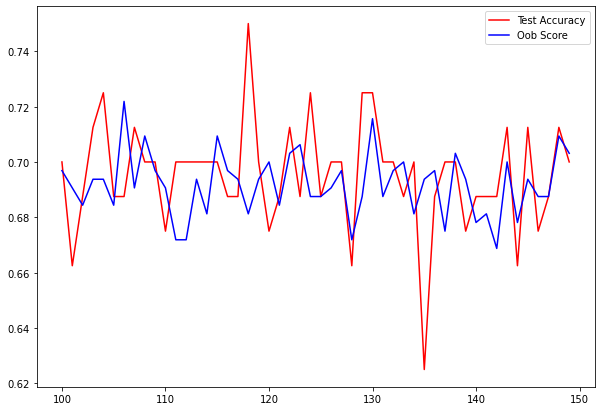

In [52]:
### Figure:-
plt.figure(figsize=(10,7))
plt.plot(Results['no_estimators'],Results['Test Accuracy'],color='red',label='Test Accuracy')
plt.plot(Results['no_estimators'],Results['Oob Score'],color='blue',label='Oob Score')
plt.legend()
plt.show()

## Building Random Forest:-

In [55]:
kfold=KFold(n_splits=5)
model_rfc=RandomForestClassifier(n_estimators=125,max_features=3)

### 1. Cross Validation:-

In [56]:
cv_result=cross_val_score(model_rfc,x,y,cv=kfold)
p_result=(cv_result.mean())*100
print('Accuracy of the model using cross validation is:-',p_result,'%')

Accuracy of the model using cross validation is:- 69.24999999999999 %


### 2. Classification Report:-

In [57]:
fit=model_rfc.fit(x_train,y_train)
fit

RandomForestClassifier(max_features=3, n_estimators=125)

In [59]:
predict=fit.predict(x_test)
predict

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
pd.crosstab(y_test,predict)

col_0,0,1,2
Status,,,
0,2,0,8
1,0,10,11
2,0,5,44


## Accuracy:-

In [61]:
acc=np.mean(predict==y_test)
accuracy=acc*100
print('Accuracy:-',accuracy,'%')

Accuracy:- 70.0 %


In [62]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         2
           1       0.48      0.67      0.56        15
           2       0.90      0.70      0.79        63

    accuracy                           0.70        80
   macro avg       0.52      0.79      0.56        80
weighted avg       0.80      0.70      0.73        80

